# **Sensitivity of Bond Prices**

In [ ]:
from datetime import datetime
from datetime import timedelta
import scipy.optimize as optimize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

## Compute the price of a 9% semiannual coupon bond with 10 years to maturity and a face value of USD 1,000. Assume that the market required yield (YTM) is 6%.

In [ ]:
def bond_price(face_value, years_to_maturity, ytm_p, coupon_rate_p, freq=1):
  ytm = ytm_p/100
  freq = float(freq)
  periods = years_to_maturity*freq
  coupon = (coupon_rate_p/100)*face_value/freq
  dt = [(i+1)/freq for i in range(int(periods))]
  price = sum([coupon/(1+ytm/freq)**(freq*t) for t in dt]) + face_value/(1+ytm/freq)**(freq*years_to_maturity)
  
  return round(price,2)

face_value = 1000
coupon_rate_p = 9
freq = 2
ytm_p = 6
years_to_maturity = 10

price = bond_price(face_value, years_to_maturity, ytm_p, coupon_rate_p, freq)
print(f'Price: ${price}')

Price: $1223.16


## Compute the price of a 9% annual coupon bond with 10 years to maturity and a face value of USD 1,000. Assume that the market required yield (YTM) is 6%.

In [ ]:
face_value = 1000
coupon_rate_p = 9
freq = 1
ytm_p = 6
years_to_maturity = 10

price = bond_price(face_value, years_to_maturity, ytm_p, coupon_rate_p, freq)
print(f'Price: ${price}')

Price: $1220.8


## Compute the effective YTM of a 7% semiannual coupon bond with 15 years to maturity and face value of USD 1,000. The market bond price is USD 655.9.


*   Assuming that the annual YTM is 10%
*   Assuming that the annual YTM is 12%



In [ ]:
def bond_price2(face_value, years_to_maturity, ytm_p, coupon_rate_p, freq=1):
  ytm = ytm_p/100
  freq = float(freq)
  periods = years_to_maturity*freq
  coupon = (coupon_rate_p/100)*face_value/freq
  price = (coupon*freq/ytm)*(1 - 1/(1 + ytm/freq)**periods) + face_value/(1 + ytm/freq)**periods
  
  return round(price,1)

face_value = 1000
coupon_rate_p = 7
freq = 2
years_to_maturity = 15
market_price = 655.9

ytm = 10
price10 = bond_price2(face_value, years_to_maturity, ytm, coupon_rate_p, freq)
print(f'Price10: ${price10} > {market_price}, {ytm}% cannot be the YTM')

ytm = 12
price12 = bond_price2(face_value, years_to_maturity, ytm, coupon_rate_p, freq)
print(f'Price12: ${price12} = {market_price}')

effective_ytm = ((1 + (ytm/100)/freq)**freq) - 1
print(f'Effective yield: {round(100*effective_ytm, 2)}%')

Price10: $769.4 > 655.9, 10% cannot be the YTM
Price12: $655.9 = 655.9
Effective yield: 12.36%


## Compute the YTM of a 8% semiannual coupon bond with 20 years to maturity and a face value of USD 1,000. Assume that the market price of the bond is 900. Find the semiannual, annual and effective annual YTM for that bond. 

In [ ]:
def bond_ytm(price, face_value, maturity_years, interest_rate_percent, freq=1, ytm=0.05):
    freq = float(freq)
    periods = maturity_years*freq
    coupon = face_value * (interest_rate_percent/100)/freq
    dt = [(i+1)/freq for i in range(int(periods))]
    ytm_func = lambda y : \
    sum([coupon / (1 + y / freq)**(freq * t) for t in dt]) + \
    face_value / (1 + y / freq)**(freq * max(dt)) - price

    return round(100*optimize.newton(ytm_func, ytm), 2)

face_value = 1000
coupon_rate_p = 8
years_to_maturity = 20
market_price = 900

freq = 2
ytm_semi = bond_ytm(market_price, face_value, years_to_maturity, coupon_rate_p, freq)/2
print(f'Semiannual YTM: {ytm_semi}%')

ytm = ytm_semi*freq
print(f'Annual YTM: {ytm}%')

effective_ytm = (1 + (ytm_semi/100))**freq - 1
print(f'Effective YTM: {round(100*effective_ytm, 2)}%')

Semiannual YTM: 4.545%
Annual YTM: 9.09%
Effective YTM: 9.3%


## Compute the YTM of a 8% annual coupon bond with 20 years to maturity and a face value of USD 1,000. Assume that the market price of the bond is 900.

In [ ]:
face_value = 1000
coupon_rate_p = 8
years_to_maturity = 20
market_price = 900
freq = 1

ytm = bond_ytm(market_price, face_value, years_to_maturity, coupon_rate_p, freq)
print(f'YTM: {ytm}%')

YTM: 9.1%


## Find the semiannual, annual and effective annual for that bond yield-to-call (YTC) of a 10% semiannual coupon bond with 20 years to maturity, a face value of USD 1,000 and price of callable bond in 6 years of USD 1,025. Assume that the market price of the bond is 848. 



In [ ]:
def bond_ytc(price, face_value, price_callable, years_to_call, interest_rate_percent, freq=1, ytm=0.05):
    freq = float(freq)
    periods = years_to_call*freq
    coupon = face_value * (interest_rate_percent/100)/freq
    dt = [(i+1)/freq for i in range(int(periods))]
    ytm_func = lambda y : \
    sum([coupon / (1 + y / freq)**(freq * t) for t in dt]) + \
    price_callable / (1 + y / freq)**(freq * max(dt)) - price

    return round(100*optimize.newton(ytm_func, ytm), 2)

def ytc_price(fv, pc, crp, ytcs, ytm, freq=1):
  ytcs = (ytcs/100)
  periods = ytm*freq
  coupon = (crp/100)*fv/freq
  f1 = coupon/ytcs
  factor = (1 + ytcs)**periods
  price = f1*(1 - 1/factor) + pc/factor
  
  return round(price, 2)

face_value = 1000
coupon_rate_p = 10
years_to_maturity = 20
market_price = 848
years_to_call = 6
price_callable = 1025

freq = 2
ytc_semi = bond_ytc(market_price, face_value, price_callable, years_to_call, coupon_rate_p, freq)/2
print(f'Semiannual YTC: {ytc_semi}%')

ytc = ytc_semi*freq
print(f'Annual YTC: {ytc}%')

effective_ytc = (1 + (ytc_semi/100))**freq - 1
print(f'Effective YTC: {round(100*effective_ytc, 2)}%')

pv = ytc_price(face_value, price_callable, coupon_rate_p, ytc_semi, years_to_call, freq)
print(f'Price value: ${pv}')

gap = round(pv - market_price, 2)
gapp = round(pv / market_price, 2)
print(f'Gap: ${gap} {gapp}%')

Semiannual YTC: 7.06%
Annual YTC: 14.12%
Effective YTC: 14.62%
Price value: $847.93
Gap: $-0.07 1.0%


## Find the semiannual, annual and zero coupon for a bond of a 9% coupon rate with 20 years to maturity, a face value of USD 1,000. Assume that the semiannual YTM is 6%.

In [ ]:
def bond_price(face_value, years_to_maturity, ytm_p, coupon_rate_p, freq=1):
  ytm = ytm_p/100
  freq = float(freq)
  periods = years_to_maturity*freq
  coupon = (coupon_rate_p/100)*face_value/freq
  dt = [(i+1)/freq for i in range(int(periods))]
  price = sum([coupon/(1+ytm/freq)**(freq*t) for t in dt]) + face_value/(1+ytm/freq)**(freq*years_to_maturity)
  
  return round(price,2)

face_value = 1000
coupon_rate_p = 9
ytm_p = 6
years_to_maturity = 20

freq = 2
price = bond_price(face_value, years_to_maturity, ytm_p, coupon_rate_p, freq)
print(f'Price semiannual frequency: ${price}')

effective_ytm = round(100*(((1 + (ytm_p/100)/freq)**freq) - 1), 2)

freq = 1
price = bond_price(face_value, years_to_maturity, effective_ytm, coupon_rate_p, freq)
print(f'Price annual frequency: ${price}')

zero = bond_price(1000, 20, 6, 0, 2)
print(f'Zero-coupon bond: ${zero}')

Price semiannual frequency: $1346.72
Price annual frequency: $1331.35
Zero-coupon bond: $306.56


## Find the bond price of a 9% semiannual coupon rate with 20 years to maturity, a maturity value of USD 1,000. Assume that the semiannual YTMs are 6 - 10%.

In [ ]:
face_value = 1000
coupon_rate_p = 9
years_to_maturity = 20
freq = 2

ytm_p = [6, 7, 8, 9 , 10]

for p in ytm_p:
  price = bond_price(face_value, years_to_maturity, p, coupon_rate_p, freq)
  if price > face_value:
    kind = "at a premium"
  elif price < face_value:
    kind = "at a discount"
  else:
    kind = "at par"
  print(f'Price ytm = {p}%: ${price} {kind}')

Price ytm = 6%: $1346.72 at a premium
Price ytm = 7%: $1213.55 at a premium
Price ytm = 8%: $1098.96 at a premium
Price ytm = 9%: $1000.0 at par
Price ytm = 10%: $914.2 at a discount


## Find the bond price of a 8% semiannual coupon rate with 20 years to maturity, a maturity value of USD 1,000. The market required yield are: are 6, 8 and 10%.

In [ ]:
face_value = 1000
coupon_rate_p = 8
years_to_maturity = 20
freq = 2

ytm_p = [6, 8, 10]
table = []
rows = []
for y in range(years_to_maturity + 1):
  rows.append(y)
  mry = [y]
  
  for p in ytm_p:
    price = bond_price(face_value, y, p, coupon_rate_p, freq)
    mry.append(price)
  
  table.append(mry)

df_prices = pd.DataFrame(table, columns = ['years', '6%', '8%', '10%'])
df_prices

,years,6%,8%,10%
0,0,1000.00,1000.0,1000.00
1,1,1019.13,1000.0,981.41
2,2,1037.17,1000.0,964.54
3,3,1054.17,1000.0,949.24
4,4,1070.20,1000.0,935.37
5,5,1085.30,1000.0,922.78
6,6,1099.54,1000.0,911.37
7,7,1112.96,1000.0,901.01
8,8,1125.61,1000.0,891.62
9,9,1137.54,1000.0,883.10


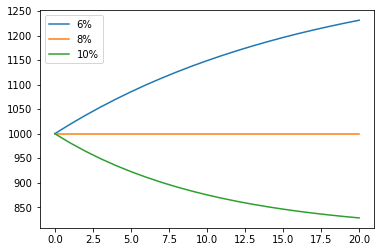

In [ ]:
df_prices.plot(y=['6%', '8%', '10%'])
plt.show()

## Find the bond price of a 8% semiannual coupon rate with range from 0 to 20 years to maturity, a face value of USD 1,000. Assume that the semiannual YTMs are 6, 8 and 10%.

In [ ]:
face_value = 1000
coupon_rate_p = 8
years_to_maturity = 20
freq = 2

ytm_p = [6, 8, 10]
table = []
rows = []
for y in range(years_to_maturity + 1):
  rows.append(y)
  mry = [y]
  
  for p in ytm_p:
    price = bond_price(face_value, y, p, coupon_rate_p, freq) - bond_price(face_value, y, p, 0, freq)
    mry.append(price)
    price = bond_price(face_value, y, p, 0, freq)
    mry.append(price)
    price = bond_price(face_value, y, p, coupon_rate_p, freq)
    mry.append(price)
  
  table.append(mry)

columns = ['years', '6%_Coupon', '6%_FV', '6%_Price', '8%_Coupon', '8%_FV', '8%_Price', '10%_Coupon',  '10%_FV', '10%_Price']
df_prices = pd.DataFrame(table, columns = columns)
df_prices

,years,6%_Coupon,6%_FV,6%_Price,8%_Coupon,8%_FV,8%_Price,10%_Coupon,10%_FV,10%_Price
0,0,0.00,1000.00,1000.00,0.00,1000.00,1000.0,0.00,1000.00,1000.00
1,1,76.53,942.60,1019.13,75.44,924.56,1000.0,74.38,907.03,981.41
2,2,148.68,888.49,1037.17,145.20,854.80,1000.0,141.84,822.70,964.54
3,3,216.69,837.48,1054.17,209.69,790.31,1000.0,203.02,746.22,949.24
4,4,280.79,789.41,1070.20,269.31,730.69,1000.0,258.53,676.84,935.37
5,5,341.21,744.09,1085.30,324.44,675.56,1000.0,308.87,613.91,922.78
6,6,398.16,701.38,1099.54,375.40,624.60,1000.0,354.53,556.84,911.37
7,7,451.84,661.12,1112.96,422.52,577.48,1000.0,395.94,505.07,901.01
8,8,502.44,623.17,1125.61,466.09,533.91,1000.0,433.51,458.11,891.62
9,9,550.15,587.39,1137.54,506.37,493.63,1000.0,467.58,415.52,883.10


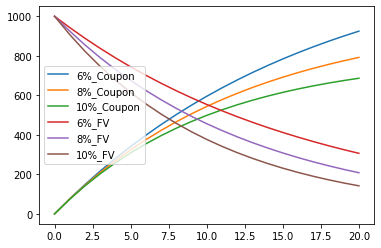

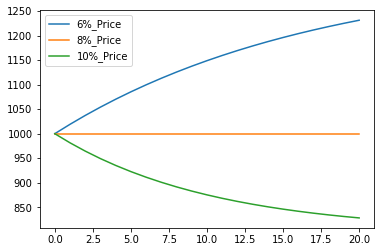

In [ ]:
df_prices.plot(y=['6%_Coupon', '8%_Coupon', '10%_Coupon', '6%_FV', '8%_FV', '10%_FV'])
plt.show()

df_prices.plot(y=['6%_Price', '8%_Price', '10%_Price'])
plt.show()

## On February 8, 2016 you purchased a Mexican sovereign bond, which paid the last coupon September 27, 2015. Semiannual coupon payments; maturity will be on September 27, 2034. YTM is 5.15% coupon rate is 6.75%. Face value is 100. Accrued interest calculation basis is ACT/365. Find the dirty and clean bond prices.

In [42]:
def clean_price(face_value, previous_coupon, first_coupon, maturity, issue, coupon_rate_p, ytm_p, freq=1, ACT=365):

  first_date = datetime.strptime(first_coupon, "%Y-%m-%d")
  maturity_date = datetime.strptime(maturity, "%Y-%m-%d")
  issue_date = datetime.strptime(issue, "%Y-%m-%d")
  previous_date = datetime.strptime(previous_coupon, "%Y-%m-%d")
  
  ytm = ytm_p/100
  days_to_maturity = (maturity_date - first_date).days
  periods = round(days_to_maturity * freq / ACT, 0)
  fraction = round((first_date - issue_date)/ (timedelta(ACT)/freq), 2)
  ai = (issue_date - previous_date)/ (timedelta(ACT)/freq)

  coupon = (coupon_rate_p/100)*face_value/freq
  accrued_interest = round(coupon * ai, 2)

  dt = [(i+1)/freq for i in range(int(periods +1 ))]
  cash_flow_coupons = sum([coupon/(1+ytm/freq)**(fraction + freq*t - 1) for t in dt])
  cash_flow_face_value = face_value/(1+ytm/freq)**periods
  dirty_price = round(cash_flow_coupons + cash_flow_face_value, 2)
  clean_price = dirty_price - accrued_interest

  return [dirty_price, accrued_interest, clean_price]

face_value = 100

previous_coupon = '2015-09-27'
first_coupon = '2016-03-27'
maturity = '2034-09-27'
issue = '2016-02-09'
coupon_rate_p = 6.75
ytm_p = 5.15
freq = 2
ACT = 365

dirty_clean = clean_price(face_value, previous_coupon, first_coupon, maturity, issue, coupon_rate_p, ytm_p, 2)
print(f'Dirty price: ${dirty_clean[0]}, Accrued interest: {dirty_clean[1]}%, Clean price: ${dirty_clean[2]}')


Dirty price: $121.77, Accrued interest: 2.5%, Clean price: $119.27


## Consider the following three-bond portfolio. Each bond pays coupons with semiannual frequency. Find the semiannual, annual and effective YTM of the portfolio.

Bond A
Coupon Rate: 7.0 %
Maturity: 5 yrs
Par Value: USD 10000000
YTM: 6 %

Bond B
Coupon Rate: 10.5 %
Maturity: 7 yrs
Par Value: USD 20000000
YTM: 10.5 %

Bond C
Coupon Rate: 6 %
Maturity: 3 yrs
Par Value: USD 30000000
YTM: 8.5 %

In [ ]:
def bond_portfolio(face_value, years_to_maturity, ytm_p, coupon_rate_p, freq=1):
  ytm = ytm_p/100
  freq = float(freq)
  periods = years_to_maturity*freq
  coupon = (coupon_rate_p/100)*face_value/freq
  dt = [(i+1)/freq for i in range(int(periods))]
  price = sum([coupon/(1+ytm/freq)**(freq*t) for t in dt]) + face_value/(1+ytm/freq)**(freq*years_to_maturity)
  cash_flow = [coupon for t in dt]
  cash_flow[-1] = coupon + face_value
  
  return [cash_flow, round(price,2)]

def add_lists(po1, po2):
  if len(po1) > len(po2):
    n1, n2 = po1, po2
  else:
    n1, n2 = po2, po1

  f_len = len(n1)-(len(n2) - 1)
  for i in range(0, len(n2), 1):
    if f_len - i >= len(n1):
      break
    else:
      n1[i] = n1[i] + n2[i]
  return n1

def portfolio_ytm(portfolio_cashflow, price, ytm=0.05):
    periods = len(portfolio_cashflow)
    dt = [i+1 for i in range(periods)]
    ytm_func = lambda y : \
    sum([portfolio_cashflow[t - 1] / (1 + y)**t for t in dt]) - price

    return round(100*optimize.newton(ytm_func, ytm), 2)


price_a = bond_portfolio(10000000, 5, 6, 7, 2)
print(f'Price A coupon: ${price_a[1]}')
price_b = bond_portfolio(20000000, 7, 10.5, 10.5, 2)
print(f'Price B coupon: ${price_b[1]}')
price_c = bond_portfolio(30000000, 3, 8.5, 6, 2)
print(f'Price C coupon: ${price_c[1]}')
market_value = price_a[1] + price_b[1] + price_c[1]
print(f'Total market value: ${market_value}')

portfolio_cashflow = add_lists(add_lists(price_a[0], price_b[0]), price_c[0])
portfolio_cashflow

semi = portfolio_ytm(portfolio_cashflow, market_value)
print(f'Semiannual YTM: {semi}%')
print(f'Annual YTM: {2*semi}%')
effective = round(100*((1 + semi/100)**2 - 1), 2)
print(f'Effective YTM: {effective}%')

Price A coupon: $10426510.14
Price B coupon: $20000000.0
Price C coupon: $28050097.5
Total market value: $58476607.64
Semiannual YTM: 4.49%
Annual YTM: 8.98%
Effective YTM: 9.18%


## Suppose that today you buy a coupon bond which matures in 20 years. You plan to sell this bond three years later. Compute the total return for your bond investment.

Maturity (years): 20

Coupon rate: 8 %

Yield-to-maturity: 10 %

Annual reinvestment rate: 6 %

Face value: USD 1.000,00

Yield for 17-year bond at the end of the investment horizon: 7 %

Investment horizon: 3

In [ ]:
# Calculate the value of the coupon payments plus the interest-on-interest at the end of the horizon
coupon_rate = 8
ytm = 10
reinvestment_rate = 6
maturity = 20
investment_horizon = 3
par_value = 1000
freq = 2
end_of_horizon_yield = 7

crp = coupon_rate/100
ytmp = ytm/100
rrp = reinvestment_rate/100
eohy = end_of_horizon_yield/100

semi_payment = par_value*crp/freq
coupon_price = (semi_payment/(ytmp/freq))*(1 - 1/(1 + ytmp/freq)**(freq*maturity))
par_price = par_value/(1 + ytmp/freq)**(freq*maturity)
purchase_price = coupon_price + par_price
print(f'Purchase price: ${round(purchase_price, 2)}')

cpi = (semi_payment/(rrp/freq))*((1 + rrp/freq)**(freq*investment_horizon) - 1)
print(f'Coupon payment + interest-on-interest: ${round(cpi, 2)}')

left_to_maturity = maturity - investment_horizon
coupon_price_left = (semi_payment/(eohy/freq))*(1 - 1/(1 + eohy/freq)**(freq*left_to_maturity))
par_price_left = par_value/(1 + eohy/freq)**(freq*left_to_maturity)
horizon_price = coupon_price_left + par_price_left
print(f'Horizon price: ${round(horizon_price, 2)}')

total_future_value = horizon_price + cpi
print(f'Total future price: ${round(total_future_value, 2)}')

semi_rate_of_return = (total_future_value/purchase_price)**(1/(freq*investment_horizon)) - 1
print(f'Semiannual rate of return: {round(100*semi_rate_of_return, 2)}%')

rate_of_return = freq * semi_rate_of_return
print(f'Annual rate of return: {round(100*rate_of_return, 2)}%')

effective_rate_of_return = (1 + semi_rate_of_return)**freq - 1
print(f'Effective rate of return: {round(100*effective_rate_of_return, 2)}%')

Purchase price: $828.41
Coupon payment + interest-on-interest: $258.74
Horizon price: $1098.5
Total future price: $1357.24
Semiannual rate of return: 8.58%
Annual rate of return: 17.15%
Effective rate of return: 17.89%




---



## **Bond pricing**

### 8) You are offered a perpetual bond paying an annual cash flow of USD 50. If the annual interest rate is 8%, what is the price you will be willing to pay?

In [ ]:
# P = C/(y/n)
cash_flow = 50
bond_rate = 8

price = cash_flow / (bond_rate/100)
print(f'Price: ${round(price, 2)}')

Price: $625.0


### 9) What happens to the price of the perpetual bond if the annual interest rate falls from 8% to 6%? 

In [ ]:
cash_flow = 50
bond_rate = 6

# P = C/(y/n)
# bond_price(face_value, years_to_maturity, ytm_p, coupon_rate_p, freq)
price = cash_flow / (bond_rate/100)
print(f'Price: ${round(price, 2)}')

Price: $833.33


### 10) Consider a bond maturing in 20 years, paying 8% semiannual coupons, with face value of US 1,000. Assume the YTM is 6%. Find the bond price. 

In [ ]:
# bond_price(face_value, years_to_maturity, ytm_p, coupon_rate_p, freq)
price = bond_price(1000, 20, 6, 8, 2)
print(f'Price: ${price}')

Price: $1231.15


### 11) What happens to the price of the  above bond if the YTM rises to 10%?

In [ ]:
# bond_price(face_value, years_to_maturity, ytm_p, coupon_rate_p, freq)
price = bond_price(1000, 20, 10, 8, 2)
print(f'Price: ${price}')

Price: $828.41


### 12) Consider a 9% semiannual coupon bond with 20 years to maturity and a face value of US 1,000. Assume that the yield-to-maturity is 12%. 

In [ ]:
# bond_price(face_value, years_to_maturity, ytm_p, coupon_rate_p, freq)
price = bond_price(1000, 20, 12, 9, 2)
print(f'Price: ${price}')

Price: $774.31


### 13) Consider a 7% seminannual coupon bond with 30 years to maturity and a face value of USD 1,000. Assume that the YTM is 12%. What happens to the bond price if the same bond matures in 20 years?

In [ ]:
# bond_price2(face_value, years_to_maturity, ytm_p, coupon_rate_p, freq=1)
price = bond_price2(1000, 30, 12, 7, 2)
print(f'Price 30y: ${price}')
price = bond_price2(1000, 20, 12, 7, 2)
print(f'Price 20y: ${price}')

Price 30y: $596.0
Price 20y: $623.8


### 14) Consider a zero-coupon bond with face value of USD 1,000 and with a YTM of 6%? Using Bond Pricing Formula calculate the bond price if the bond matures in 10 years and the price if it matures in 20 years.

In [ ]:
# bond_price(face_value, years_to_maturity, ytm_p, coupon_rate_p, freq=1)
price = bond_price(1000, 10, 6, 0, 1)
print(f'Zero coupon price 10y: ${price}')
price = bond_price(1000, 20, 6, 0, 1)
print(f'Zero coupon price 20y: ${price}')

Zero coupon price 10y: $558.39
Zero coupon price 20y: $311.8


## **Yield measures**

### 16) Consider a bond, paying 8% semiannual coupons, with face value of US 1,000, maturing in 15 years and selling for US 724.7. Find the semiannual YTM.  

In [ ]:
# bond_ytm(price, face_value, maturity_years, interest_rate_percent, freq=1, ytm=0.05)

ytm_semi = bond_ytm(724.7, 1000, 15, 8, 2)/2
print(f'Semiannual YTM: {ytm_semi}%')

Semiannual YTM: 6.0%


### 17) Following the previous exercise, calculate the effective annual yield.

In [ ]:
effective_ytm = ((1 + (ytm_semi/100))**freq) - 1
print(f'Effective yield: {round(100*effective_ytm, 2)}%')

Effective yield: 12.36%


### 18) What is the YTM of a USD 100 face value 15-year bond paying 7.5% annual coupons and priced at 102.45?

In [ ]:
# bond_ytm(price, face_value, maturity_years, interest_rate_percent, freq=1, ytm=0.05)
ytm_annual = bond_ytm(102.45, 100, 15, 7.5, 1)
print(f'Annual YTM: {ytm_annual}%')

Annual YTM: 7.23%


### 20) Consider a 20-year, 8.5% coupon bond selling for USD 850.42 per USD 1,000 par value. This bond is callable in 10 years at  USD 1,025. Find the semiannual yield-to-call (YTC) and the annual YTC. 

In [ ]:
# bond_ytc(price, face_value, price_callable, years_to_call, interest_rate_percent, freq=1, ytm=0.05)

ytc_semi = bond_ytc(850.42, 1000, 1025, 5, 8.5, 2)/2
print(f'Semiannual YTC: {ytc_semi}%')

ytc = ytc_semi*freq
print(f'Annual YTC: {ytc}%')

Semiannual YTC: 6.52%
Annual YTC: 13.04%


### 21) Find the effective yield. 

In [ ]:
effective_ytc = (1 + (ytc_semi/100))**freq - 1
print(f'Effective YTC: {round(100*effective_ytc, 2)}%')

Effective YTC: 13.47%


### 22) Calculate the bond price when the YTM is equal to 8%, 9% and 10%.

*   Maturity (years): 30
*   Settlement date: 2016-01-01
*   Maturity date: 2046-01-01
*   Coupon rate: 7 %
*   Frequency: Semiannual
*   Face value USD: 1000 

In [ ]:
# bond_price2(face_value, years_to_maturity, ytm_p, coupon_rate_p, freq=1)

ytm_p = 8
price = bond_price2(1000, 30, ytm_p, 7, 2)
print(f'Price 8%: ${price}')

ytm_p = 9
price = bond_price2(1000, 30, ytm_p, 7, 2)
print(f'Price 9%: ${price}')

ytm_p = 10
price = bond_price2(1000, 30, ytm_p, 7, 2)
print(f'Price 10%: ${price}')

Price 8%: $886.9
Price 9%: $793.6
Price 10%: $716.1


## **Premium, Par, and Discount Bonds**

### 25) Consider three bonds, A, B, and C, each paying 7% semiannual coupons, and with face value of USD 1,000. For each bond, calculate the price when the YTM ranges from 1% to 20%.

Maturity (years)
1.   Bond A: 30
2.   Bond B: 15
3.   Bond C: 5



In [ ]:
def bond_ytm_graph(ytm_min, ytm_max, maturity, fv, coupon_per, freq=1):
  rows = []

  for y in range(ytm_min, ytm_max + 1):
    row = []
    row.append(y)
    
    for m in maturity:
      row.append(bond_price(fv, m, y, coupon_per, freq))
    
    rows.append(row)

  return rows

prices = bond_ytm_graph(1, 20, [30, 15, 5], 1000, 7, 2)
columns = ['YTM%','Bond A', 'Bond B', 'Bond C']
df_prices = pd.DataFrame(prices, columns = columns)
df_prices

,YTM%,Bond A,Bond B,Bond C
0,1,2551.77,1833.82,1291.91
1,2,2123.88,1645.19,1236.78
2,3,1787.61,1480.32,1184.44
3,4,1521.41,1335.95,1134.74
4,5,1309.09,1209.30,1087.52
5,6,1138.38,1098.00,1042.65
6,7,1000.00,1000.00,1000.00
7,8,886.88,913.54,959.45
8,9,793.62,837.11,920.87
9,10,716.06,769.41,884.17


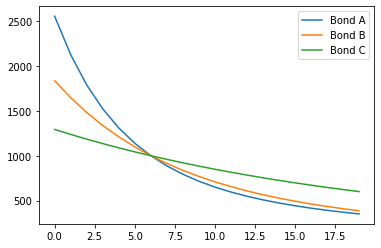

In [ ]:
df_prices.plot(y=['Bond A', 'Bond B', 'Bond C'])
plt.show()

### 28) Recalculate the bond prices at each YTM, now with a coupon rate of 10%.

In [ ]:
prices = bond_ytm_graph(1, 20, [30, 15, 5], 1000, 10, 2)
columns = ['YTM%','Bond A', 'Bond B', 'Bond C']
df_prices = pd.DataFrame(prices, columns = columns)
df_prices

,YTM%,Bond A,Bond B,Bond C
0,1,3327.65,2250.73,1437.87
1,2,2798.20,2032.31,1378.85
2,3,2378.31,1840.55,1322.78
3,4,2042.83,1671.89,1269.48
4,5,1772.72,1523.26,1218.80
5,6,1553.51,1392.01,1170.60
6,7,1374.17,1275.88,1124.75
7,8,1226.23,1172.92,1081.11
8,9,1103.19,1081.44,1039.56
9,10,1000.00,1000.00,1000.00


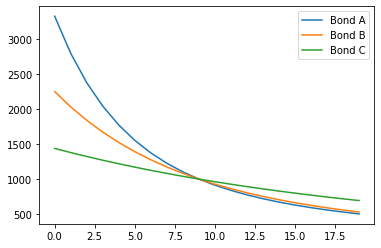

In [ ]:
df_prices.plot(y=['Bond A', 'Bond B', 'Bond C'])
plt.show()

### 29) Suppose you have a 20-year bond paying 8% semiannual coupon, with face value of USD 1000. Assuming that YTM is 7%, 8% and 9%, calculate the bond price over time. As we approach maturity, what happens to the price of the bond?

In [ ]:
face_value = 1000
coupon_rate_p = 8
years_to_maturity = 20
freq = 2

ytm_p = [7, 8, 9]
table = []
rows = []
for y in range(years_to_maturity + 1):
  rows.append(y)
  mry = [y]
  
  for p in ytm_p:
    price = bond_price(face_value, y, p, coupon_rate_p, freq) - bond_price(face_value, y, p, 0, freq)
    mry.append(price)
    price = bond_price(face_value, y, p, 0, freq)
    mry.append(price)
    price = bond_price(face_value, y, p, coupon_rate_p, freq)
    mry.append(price)
  
  table.append(mry)

columns = ['years', '6%_Coupon', '6%_FV', '6%_Price', '8%_Coupon', '8%_FV', '8%_Price', '10%_Coupon',  '10%_FV', '10%_Price']
df_prices = pd.DataFrame(table, columns = columns)
df_prices

,years,6%_Coupon,6%_FV,6%_Price,8%_Coupon,8%_FV,8%_Price,10%_Coupon,10%_FV,10%_Price
0,0,0.00,1000.00,1000.00,0.00,1000.00,1000.0,0.00,1000.00,1000.00
1,1,75.99,933.51,1009.50,75.44,924.56,1000.0,74.91,915.73,990.64
2,2,146.93,871.44,1018.37,145.20,854.80,1000.0,143.50,838.56,982.06
3,3,213.14,813.50,1026.64,209.69,790.31,1000.0,206.31,767.90,974.21
4,4,274.96,759.41,1034.37,269.31,730.69,1000.0,263.83,703.19,967.02
5,5,332.66,708.92,1041.58,324.44,675.56,1000.0,316.51,643.93,960.44
6,6,386.54,661.78,1048.32,375.40,624.60,1000.0,364.75,589.66,954.41
7,7,436.82,617.78,1054.60,422.52,577.48,1000.0,408.92,539.97,948.89
8,8,483.76,576.71,1060.47,466.09,533.91,1000.0,449.36,494.47,943.83
9,9,527.59,538.36,1065.95,506.37,493.63,1000.0,486.40,452.80,939.20


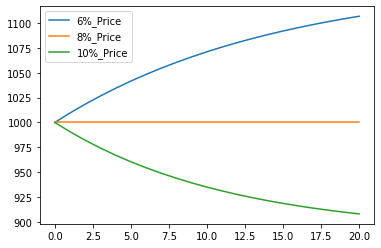

In [ ]:
df_prices.plot(y=['6%_Price', '8%_Price', '10%_Price'])
plt.show()

## **Dirty vs. Clean Prices**

### 31) Suppose that on October 22, 2015 you buy a bond which paid the last annual coupon on June 15, 2015. The bond pays 8.3% annual coupons and matures on June 15, 2021. Its current market (clean) price is USD 102.48, while its face value is USD 100. The accrued interest calculation basis is ACT/365. Calculate Accrued Interest, which is due to the previous bondholder.

In [57]:
def ytm_clean(face_value, clean_price, previous_coupon, first_coupon, maturity, issue, coupon_rate_p, freq=1, ACT=365, ytm=0.05):
  first_date = datetime.strptime(first_coupon, "%Y-%m-%d")
  maturity_date = datetime.strptime(maturity, "%Y-%m-%d")
  issue_date = datetime.strptime(issue, "%Y-%m-%d")
  previous_date = datetime.strptime(previous_coupon, "%Y-%m-%d")
  
  days_to_maturity = (maturity_date - first_date).days
  periods = round(days_to_maturity * freq / ACT, 0)
  fraction = round((first_date - issue_date)/ (timedelta(ACT)/freq), 2)
  ai = (issue_date - previous_date)/ (timedelta(ACT)/freq)

  coupon = (coupon_rate_p/100)*face_value/freq
  accrued_interest = coupon * ai
  dirty_price = clean_price + accrued_interest

  dt = [(i+1)/freq for i in range(int(periods))]
  ytm_func = lambda y : \
  sum([coupon / (1 + y / freq)**(fraction + freq*t - 1) for t in dt]) + \
  face_value / (1 + y / freq)**(freq * max(dt)) - clean_price
  
  ytm = 100*optimize.newton(ytm_func, ytm)

  return [dirty_price, accrued_interest, ytm]

face_value = 100
clean_price = 102.48

previous_coupon = '2015-06-15'
first_coupon = '2016-06-15'
maturity = '2021-06-15'
issue = '2015-10-22'
coupon_rate_p = 8.3
freq = 1
ACT = 365

dirty_clean = ytm_clean(face_value, clean_price, previous_coupon, first_coupon, maturity, issue, coupon_rate_p)

print(f'Accrued interest: ${round(dirty_clean[1], 2)}')


Accrued interest: $2.93


### 32) Find the Dirty Price.

In [54]:
print(f'Dirty price: ${round(dirty_clean[0], 2)}')

Dirty price: $105.41


### 33) Calculate the YTM of the bond.

In [56]:
print(f'YTM: {round(dirty_clean[2], 2)}%')

YTM: 7.9%


## **Yield of a Bond Portfolio**